# Bland-Altman Visualization for Technical Replicates

In [1]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent.resolve()))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.postprocessing import plot_bland_altman

In [3]:
raw_data = pd.read_excel(
    "../../raw_data/ClusterMarkers_1819ADcohort.congregated_DR.xlsx", sheet_name=1
)

In [4]:
raw_data = raw_data.set_index("gene_id")

In [5]:
patients_df = raw_data[~raw_data.loc[:, "Coeff"].isnull()]
coefficients = np.nan_to_num(np.array(patients_df.loc[:, "Coeff"]))
patients_df = patients_df.filter(regex=r"^\d+")

In [6]:
cols_with_replicates = list(set([col.split("-")[0] for col in patients_df.columns if col.endswith("r2")]))

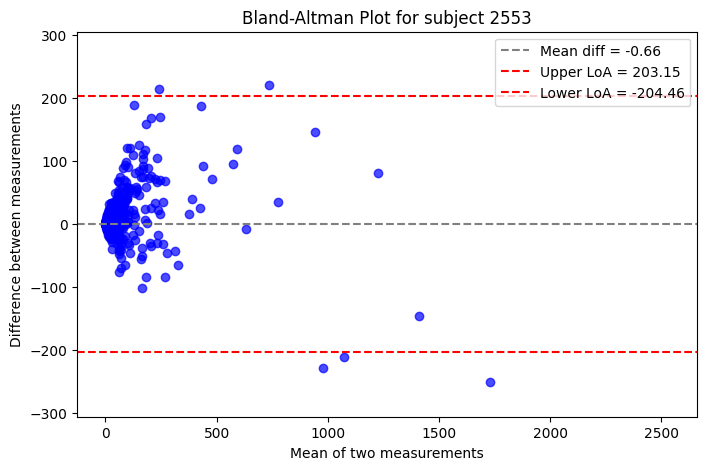

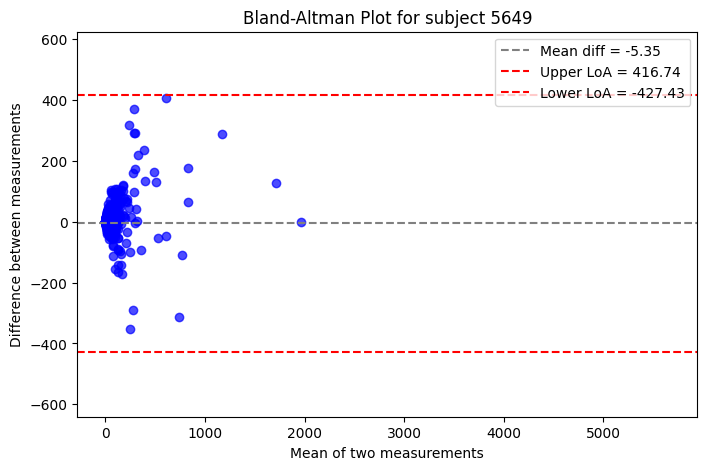

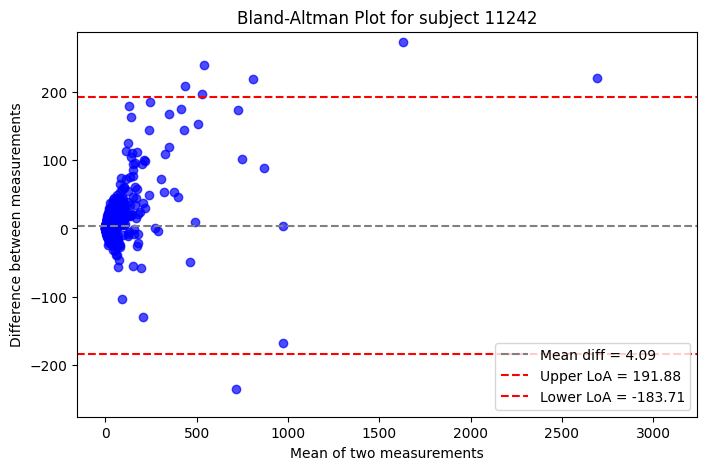

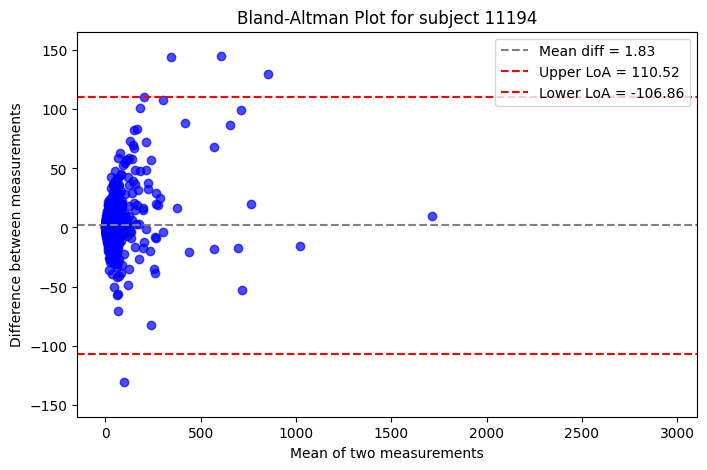

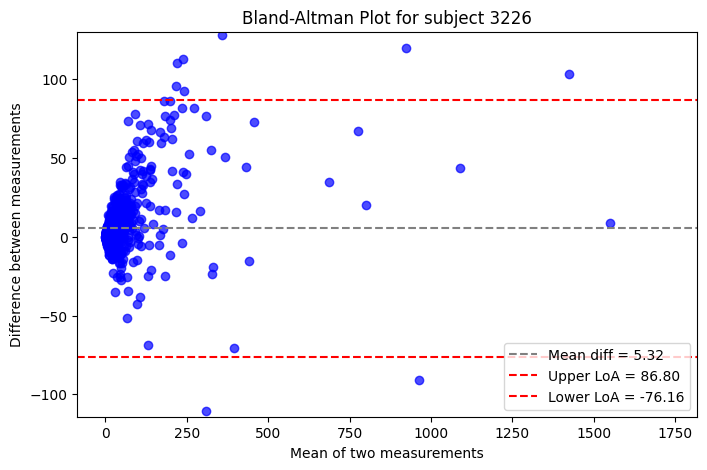

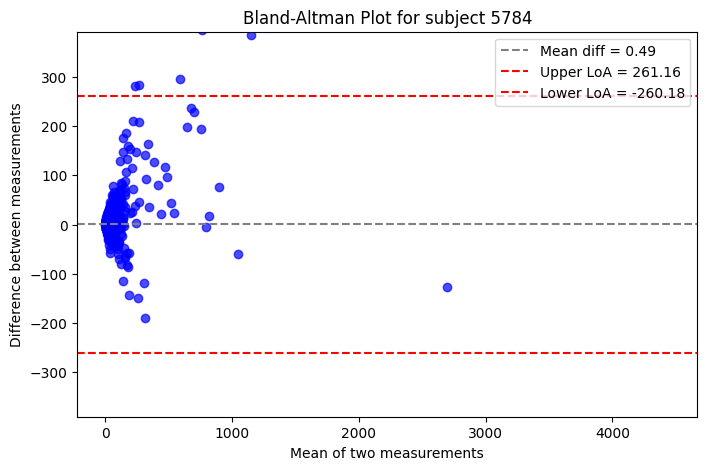

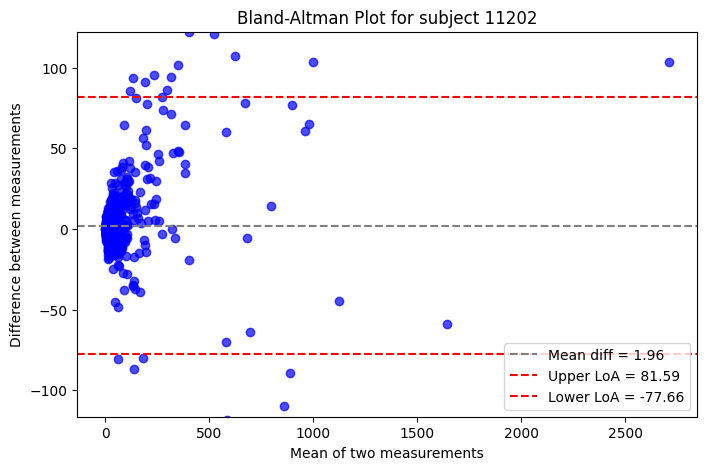

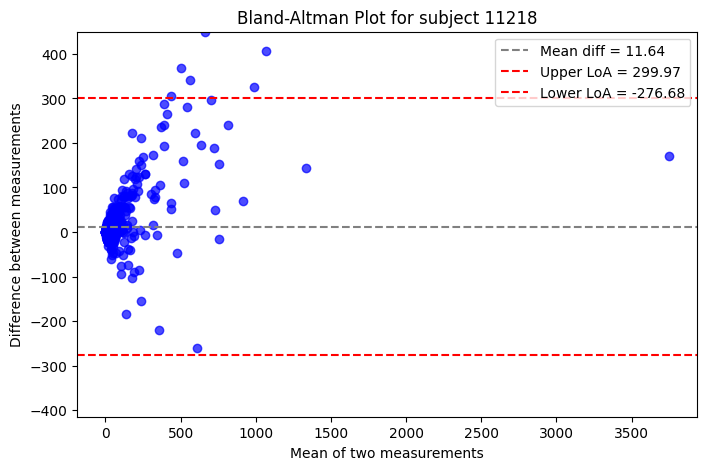

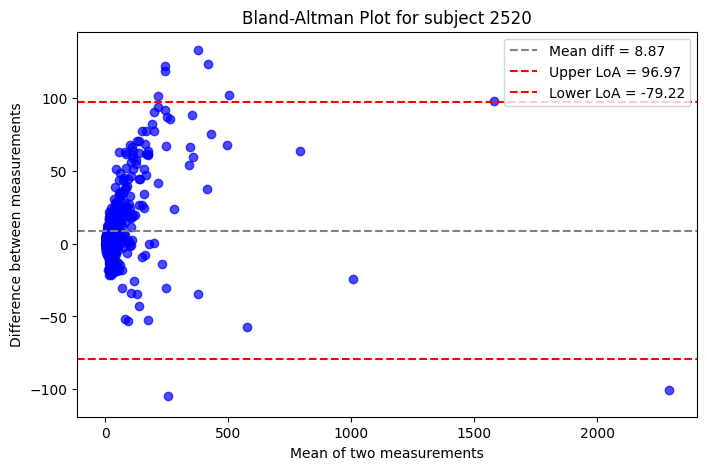

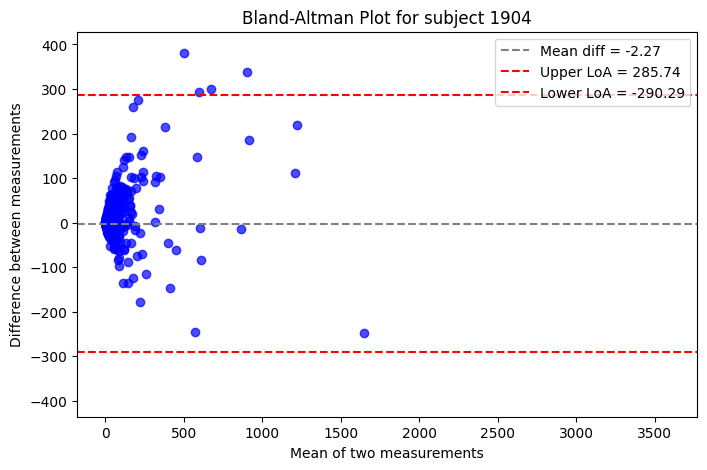

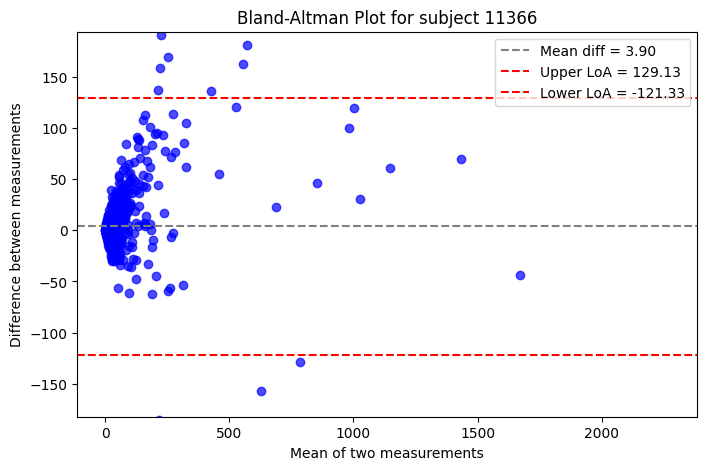

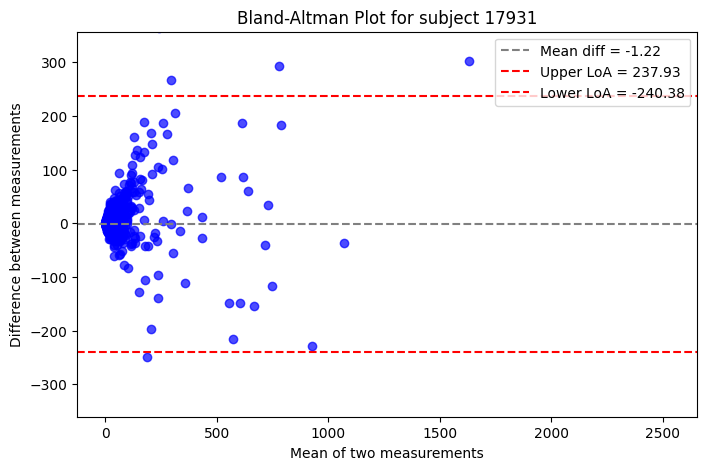

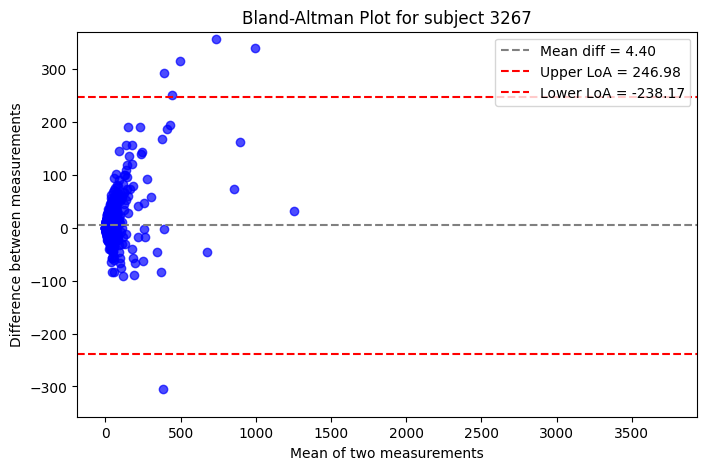

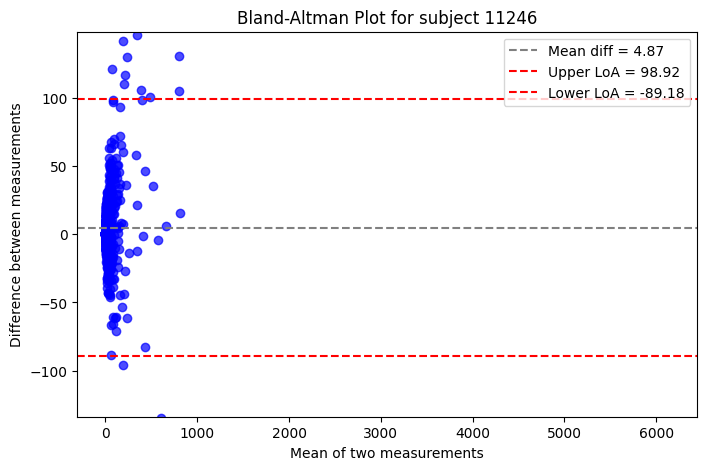

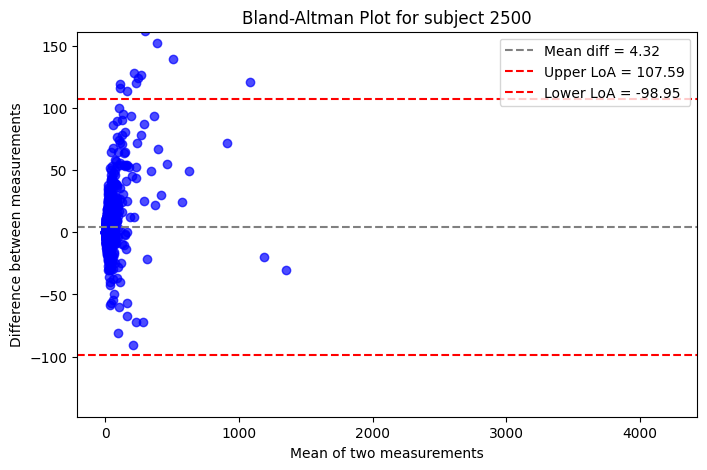

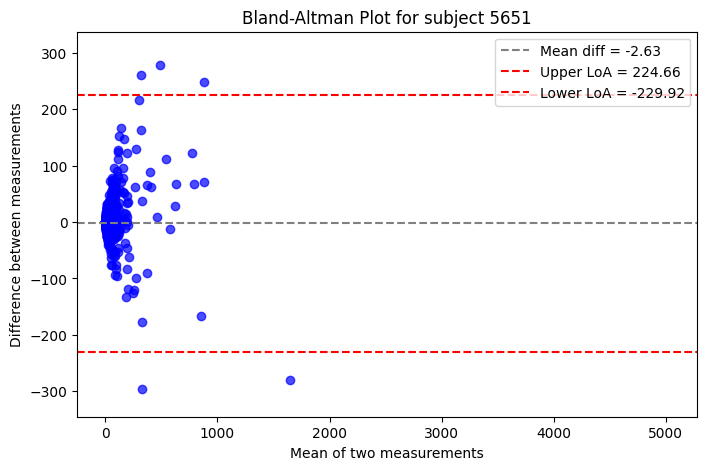

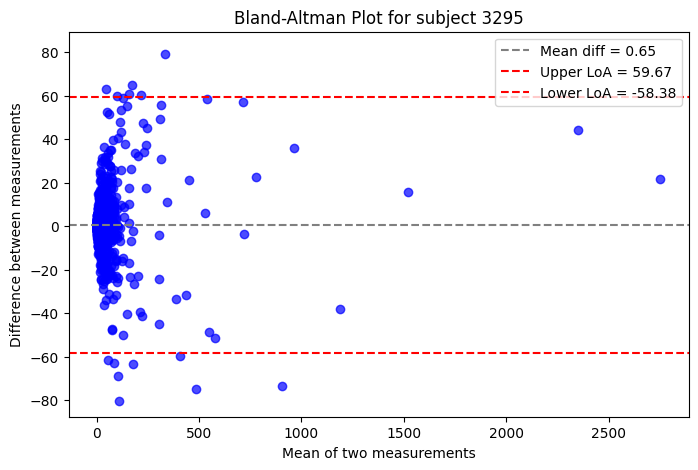

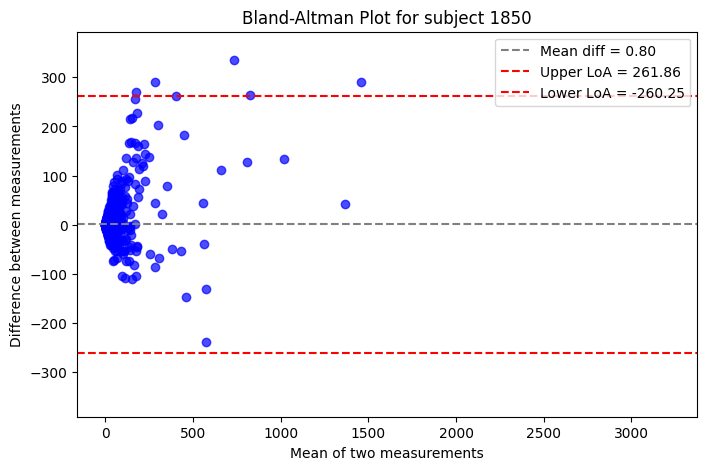

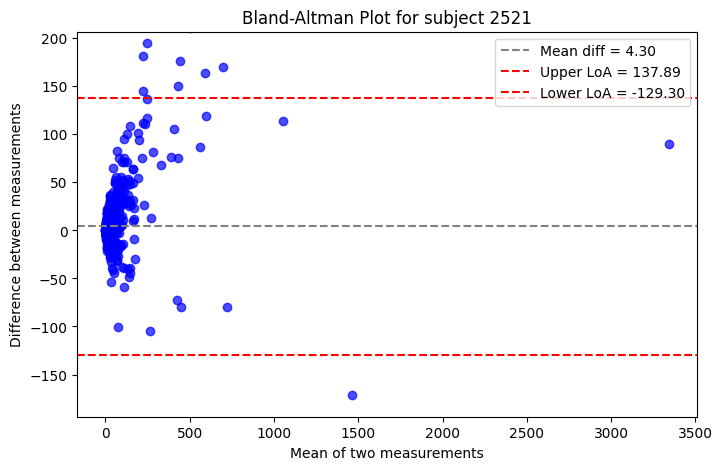

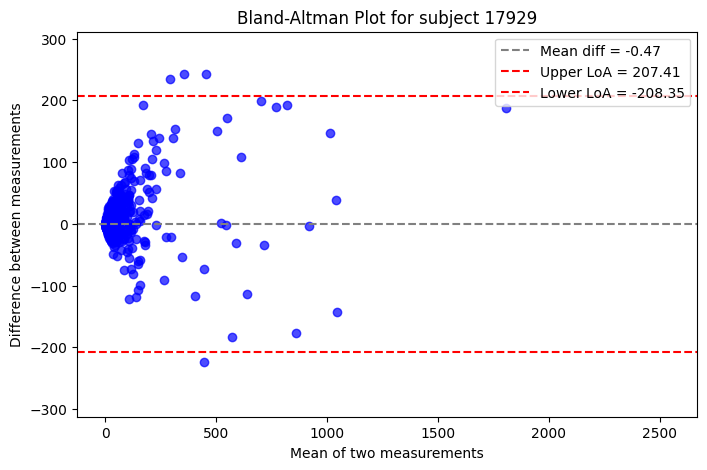

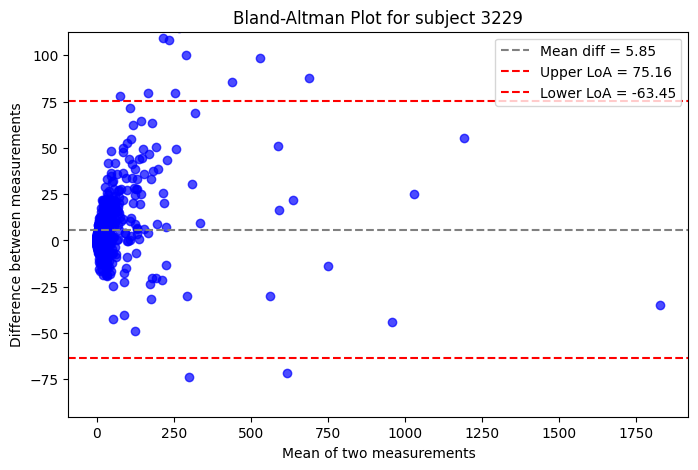

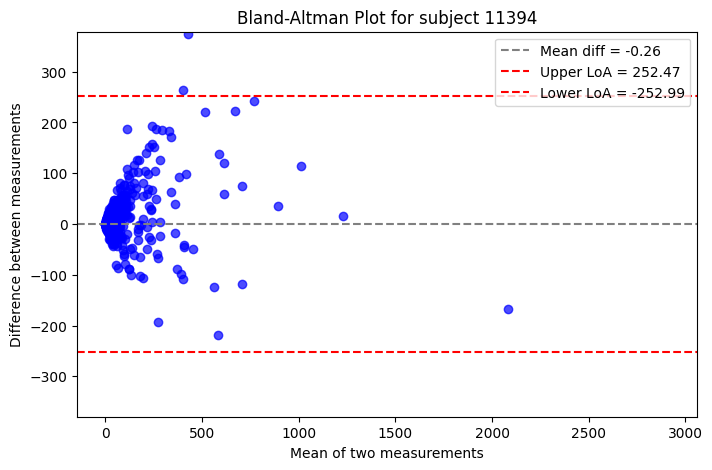

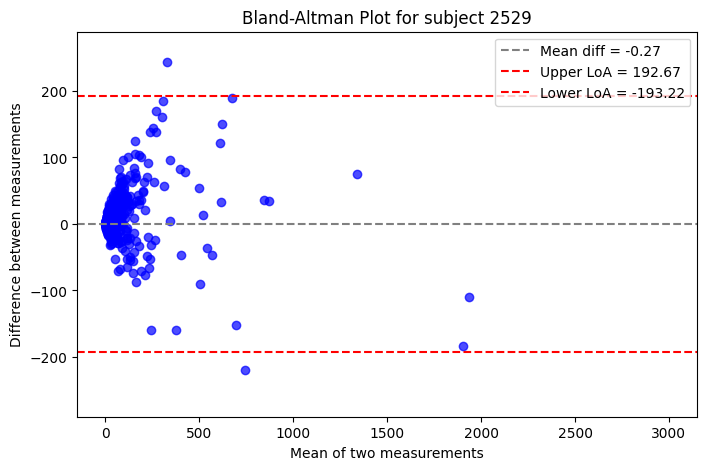

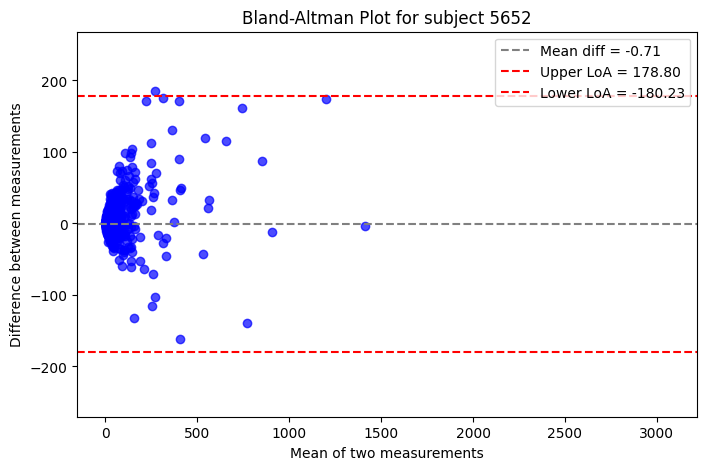

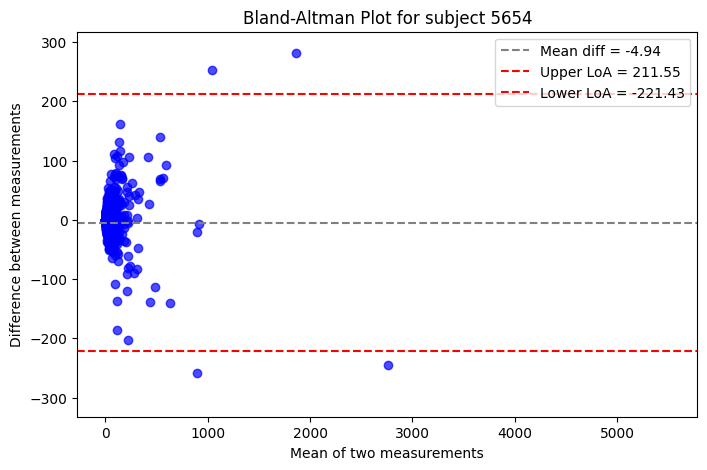

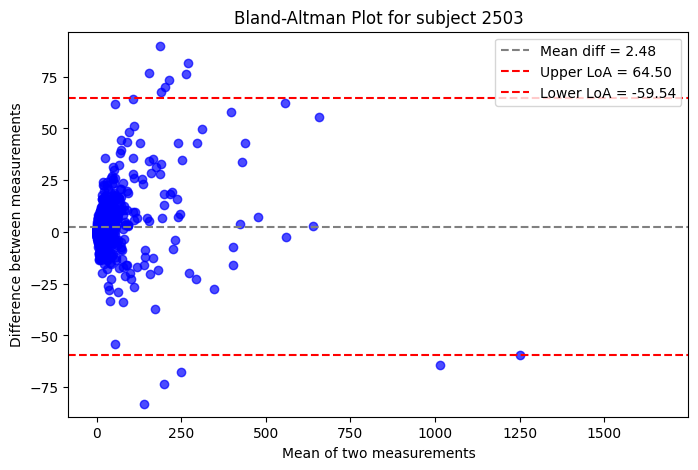

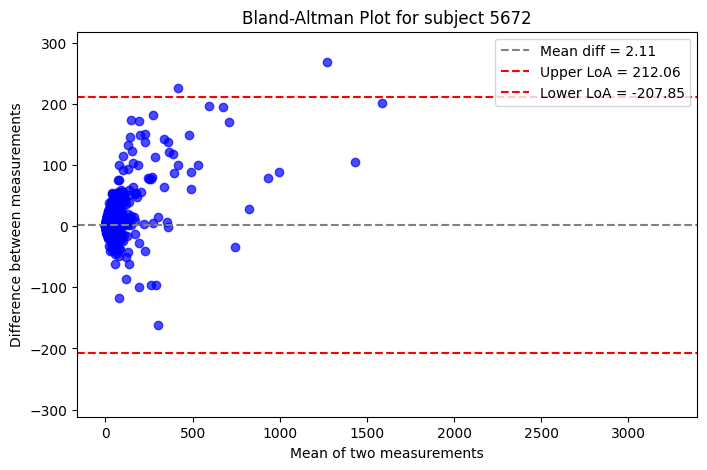

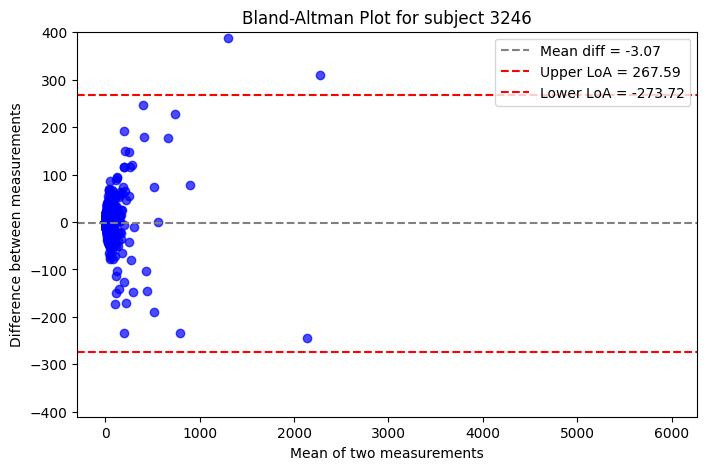

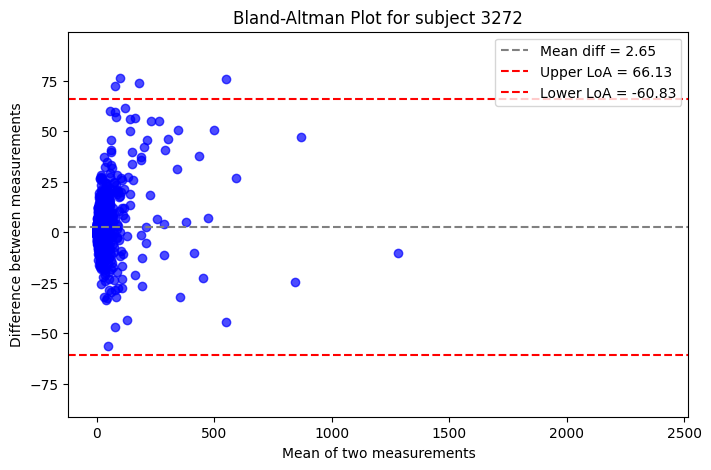

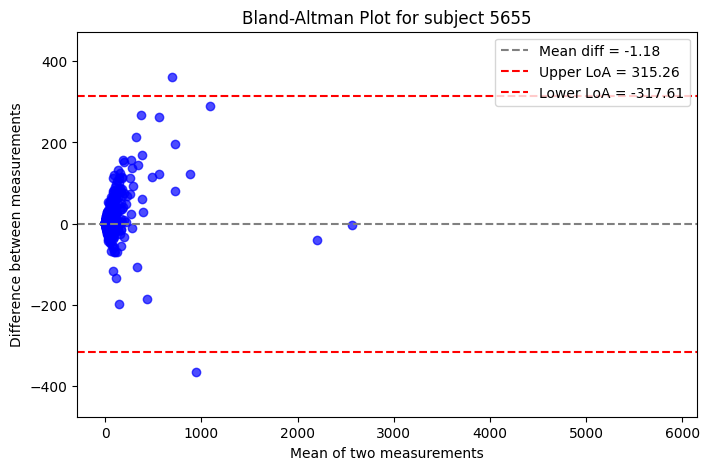

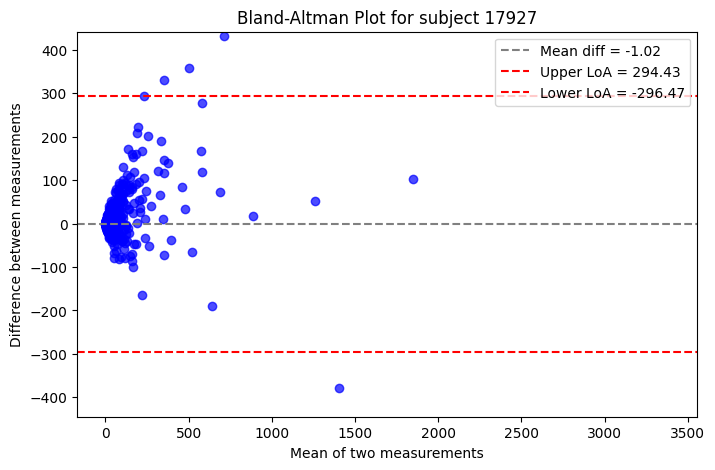

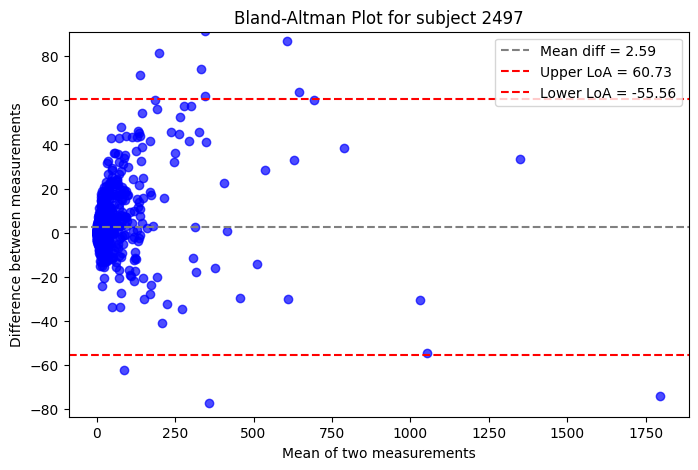

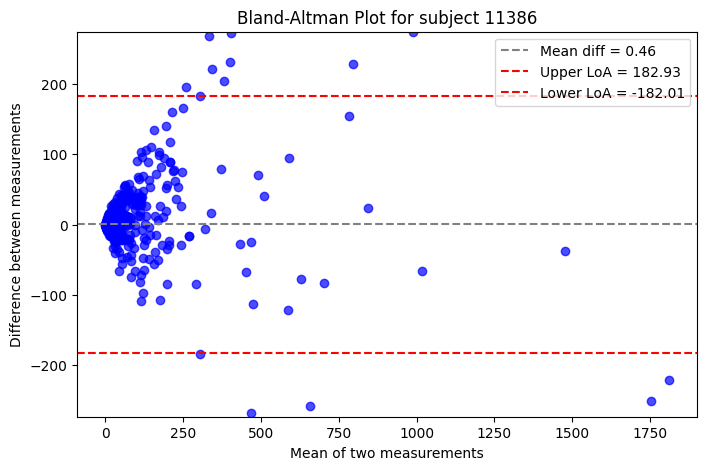

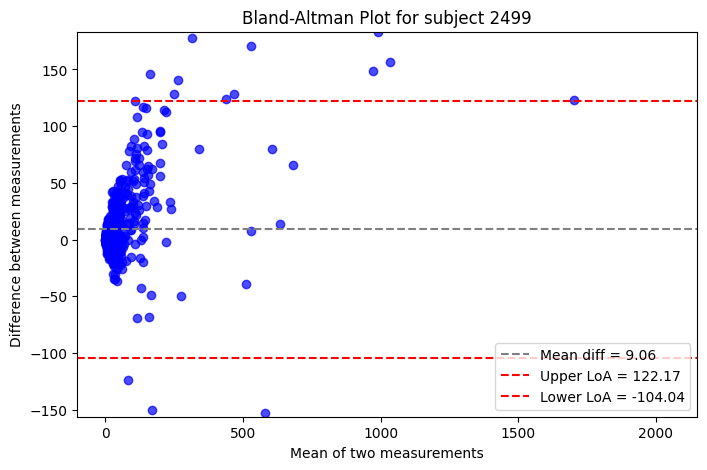

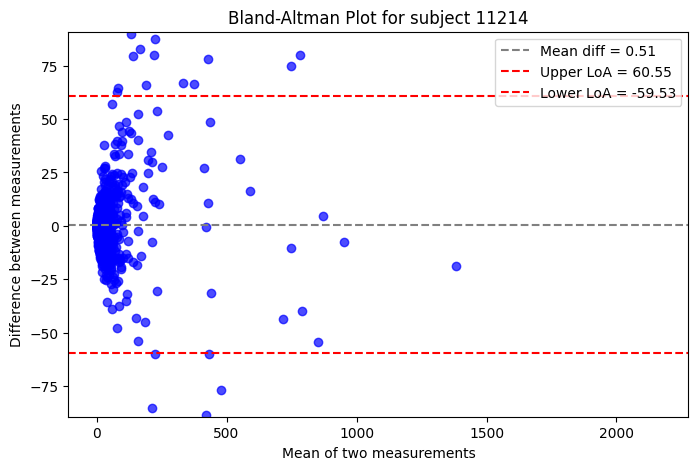

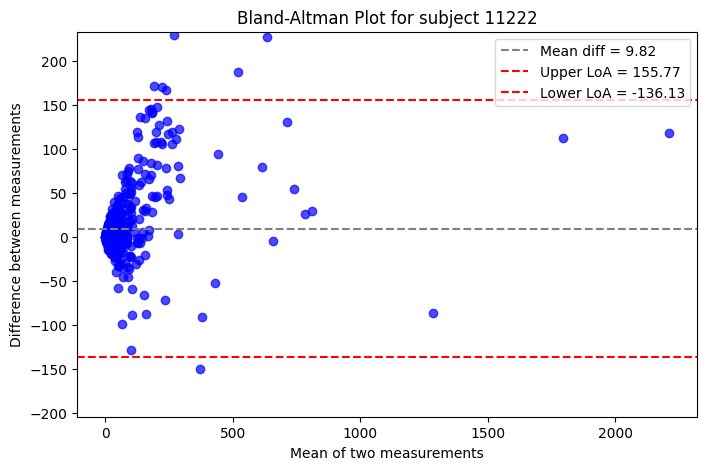

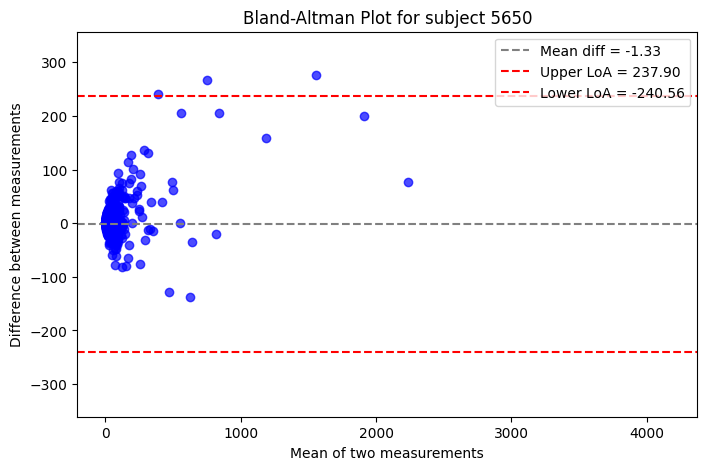

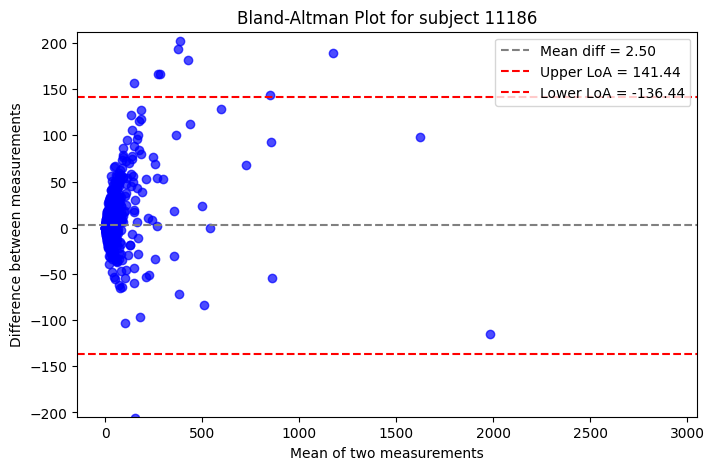

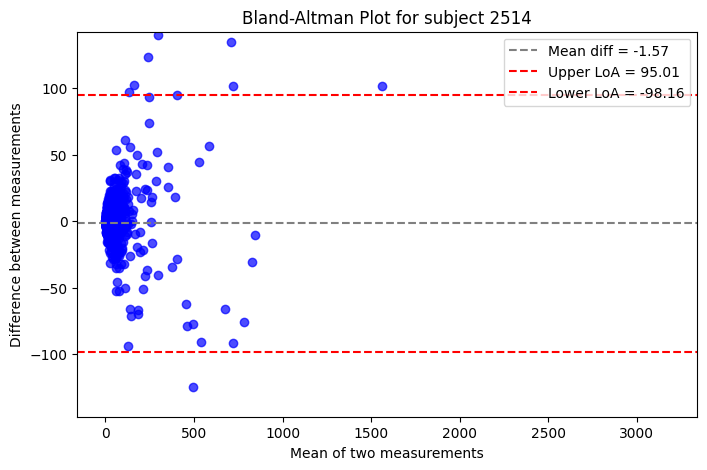

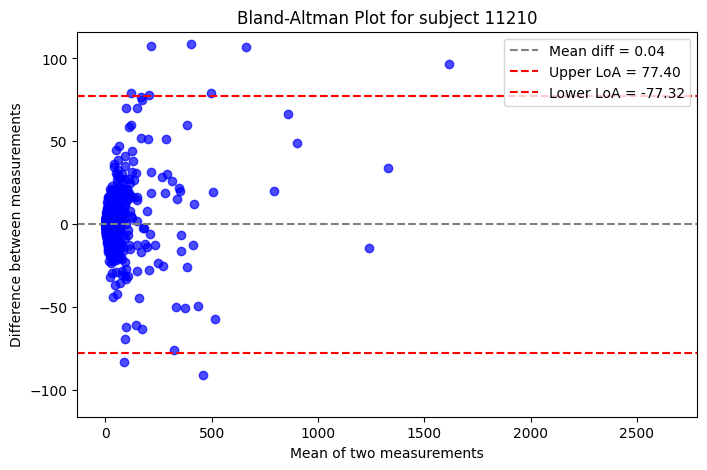

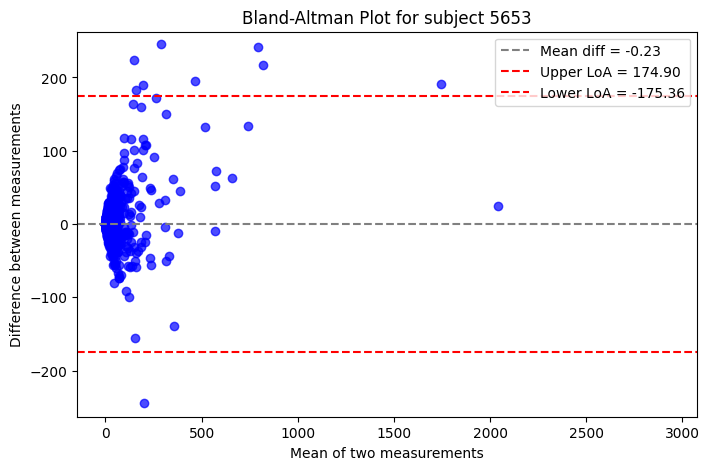

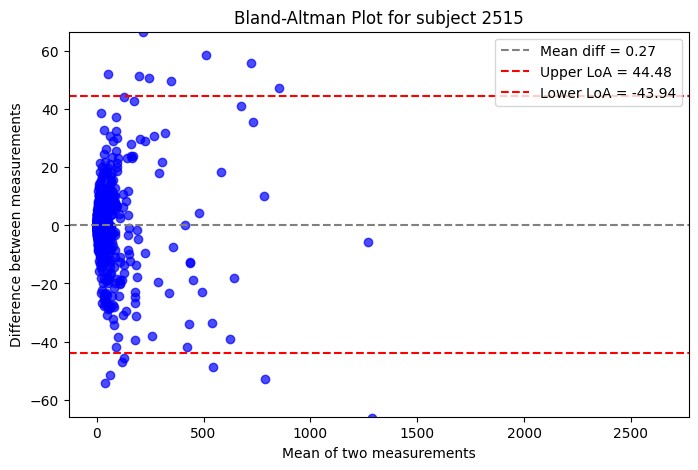

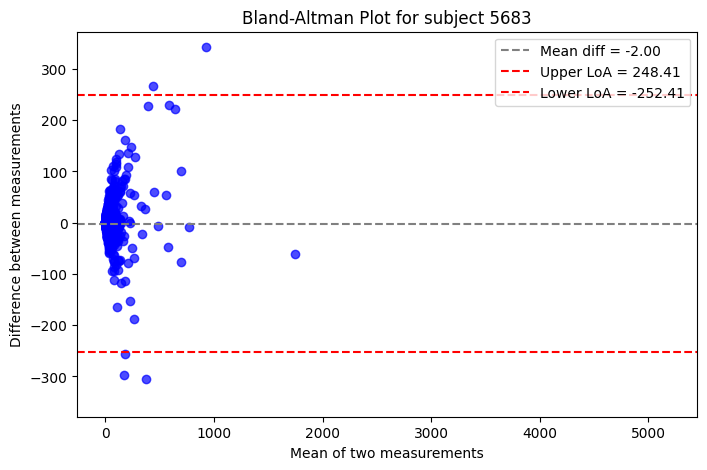

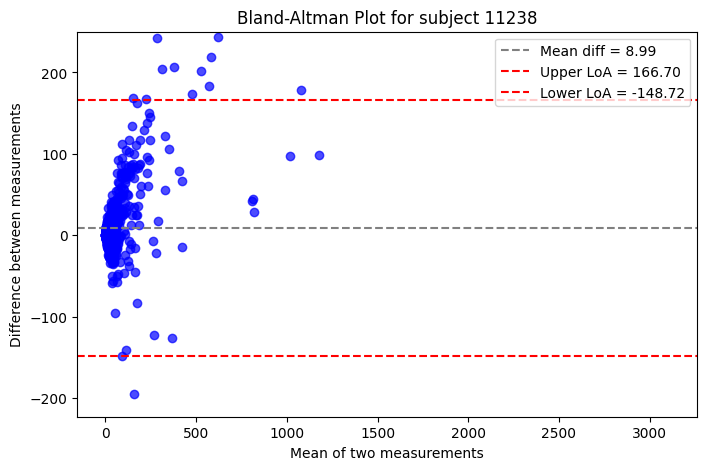

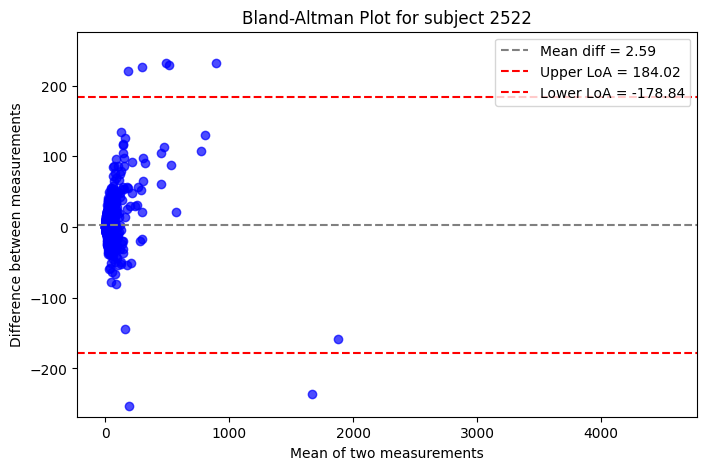

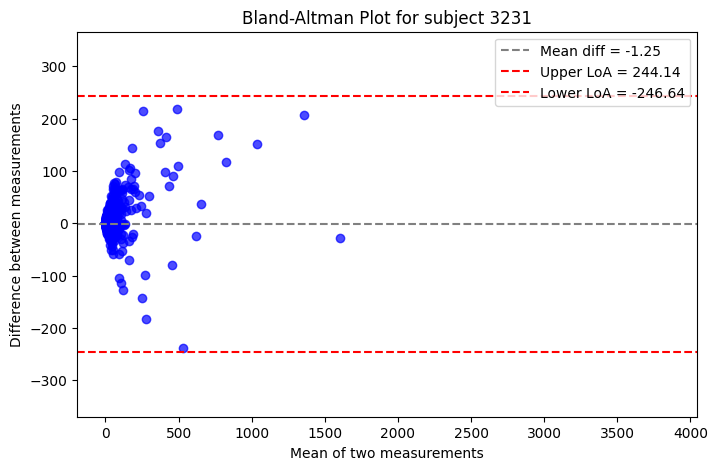

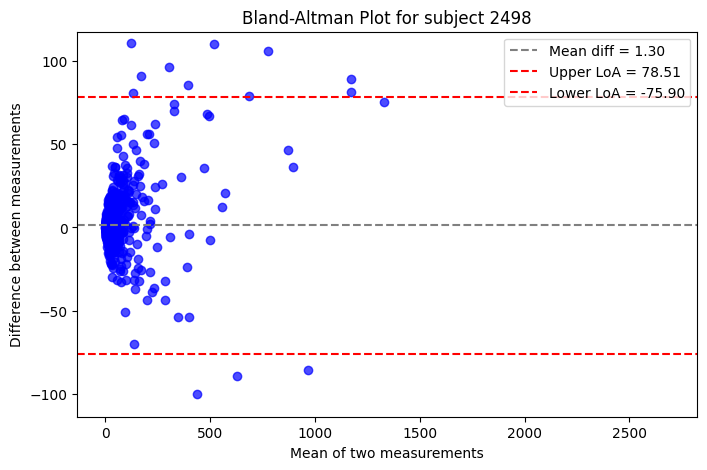

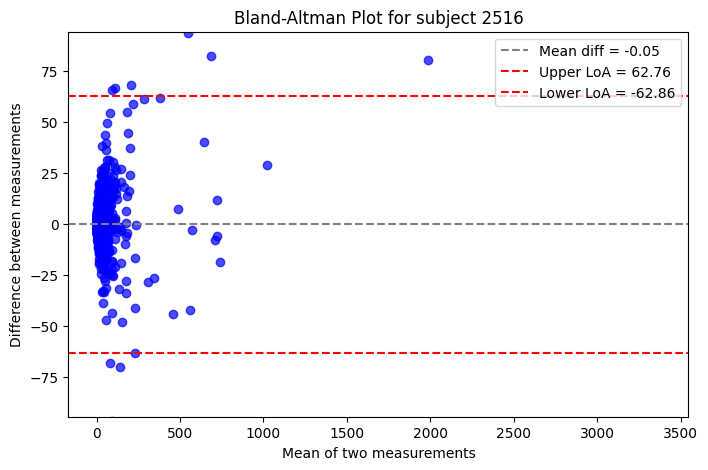

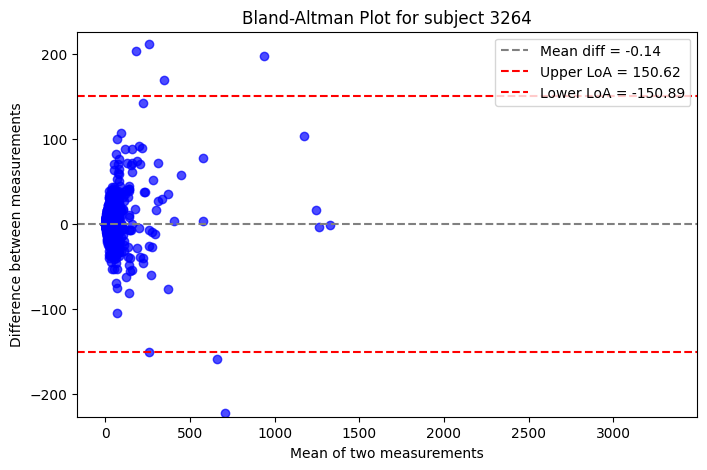

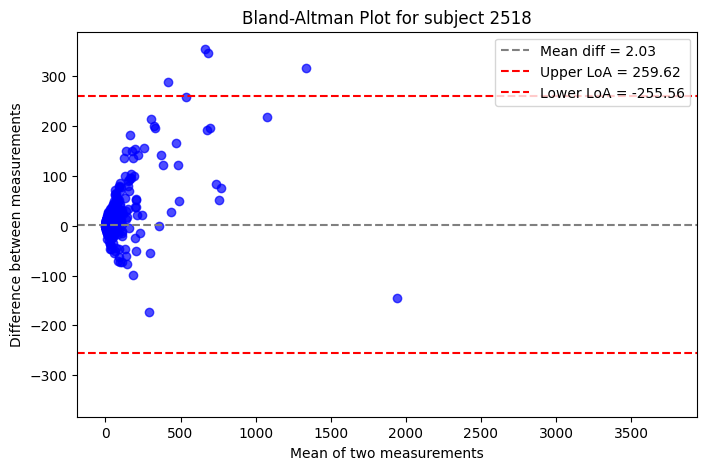

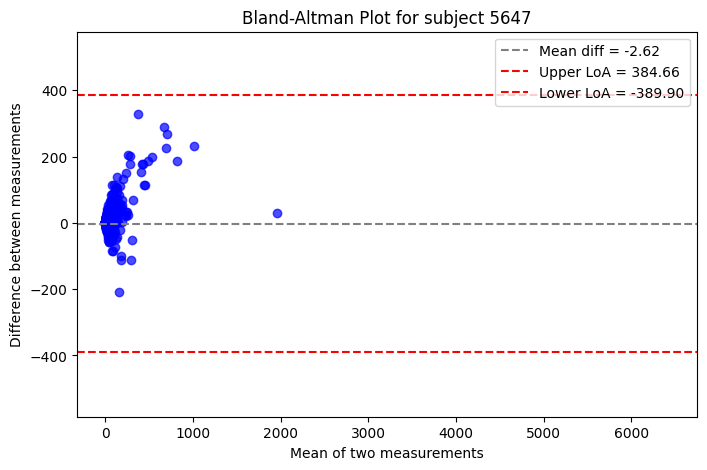

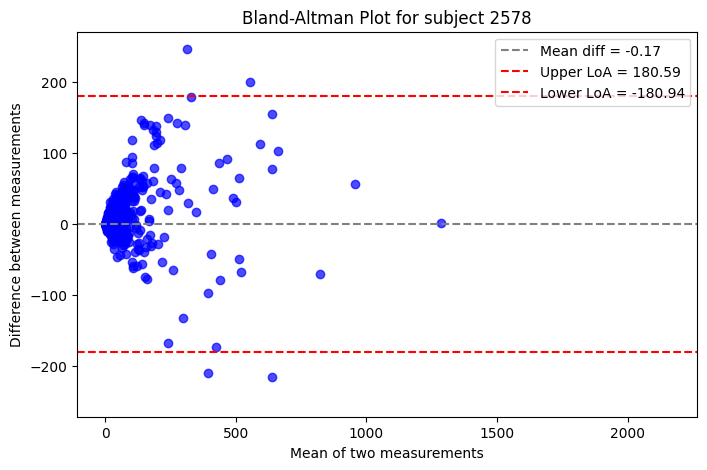

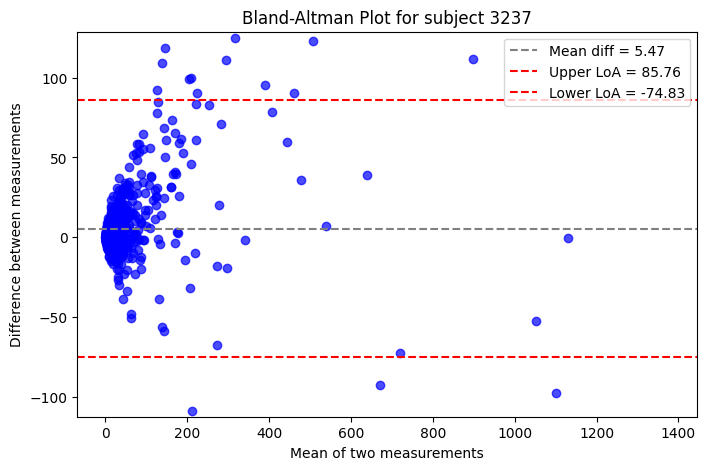

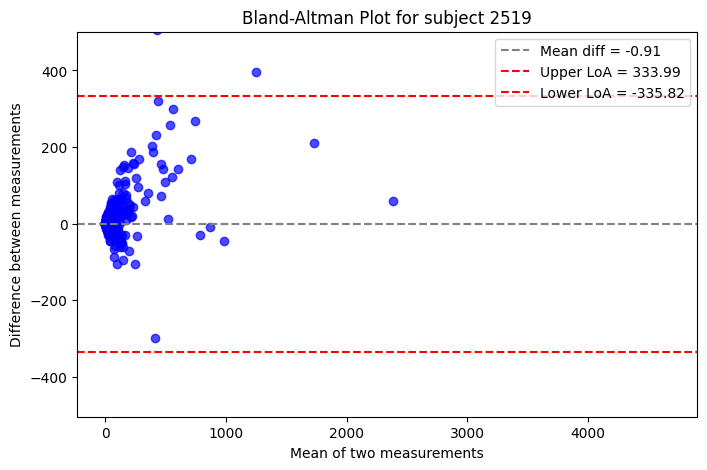

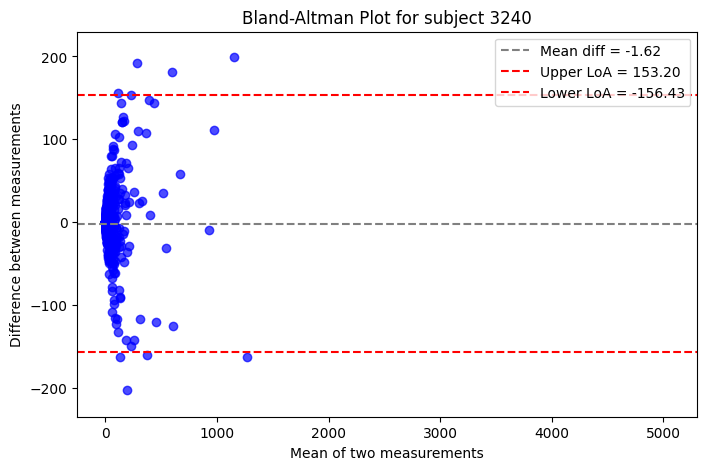

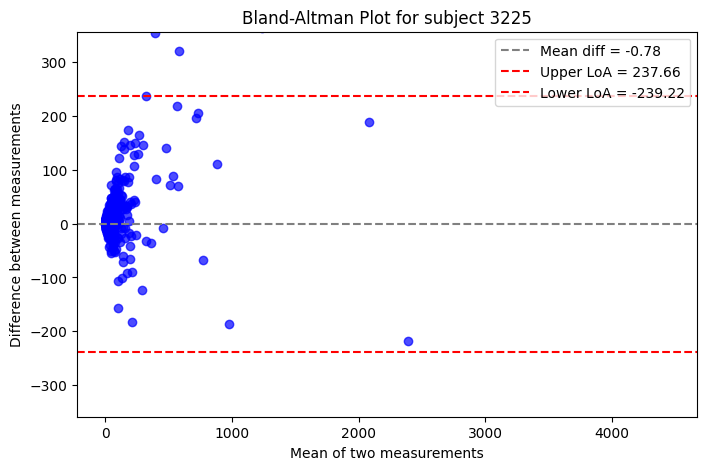

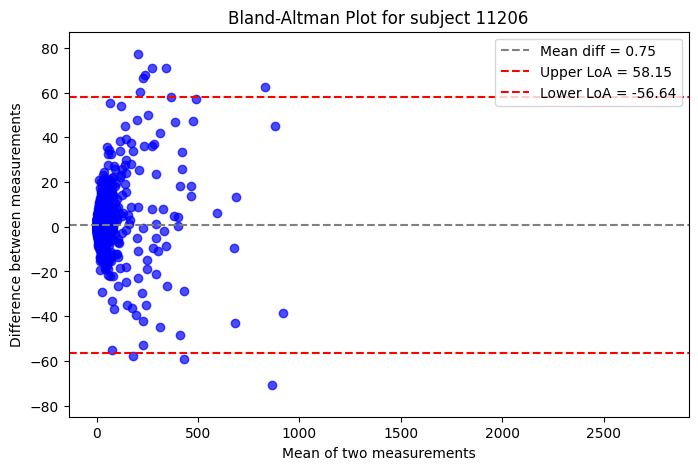

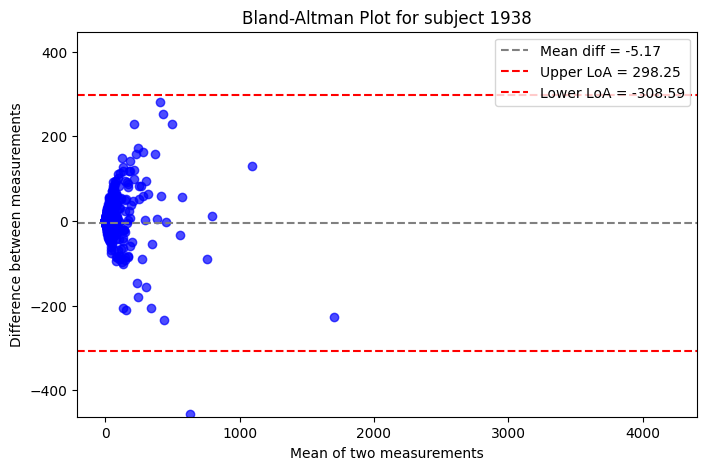

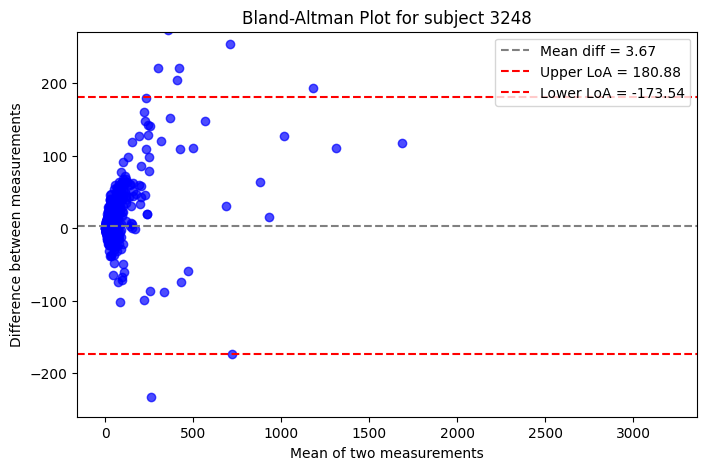

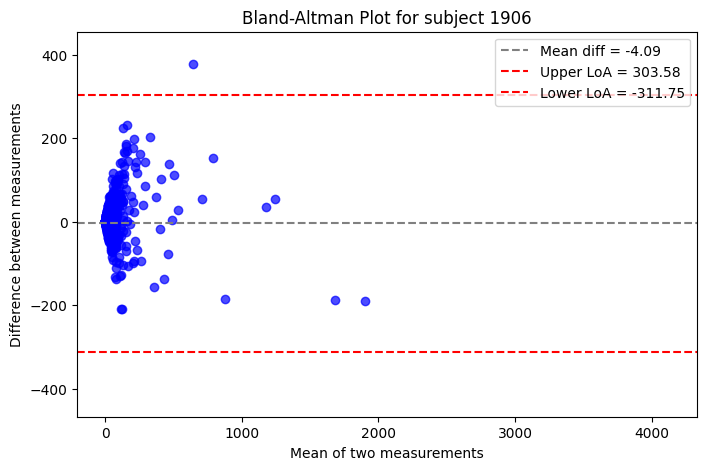

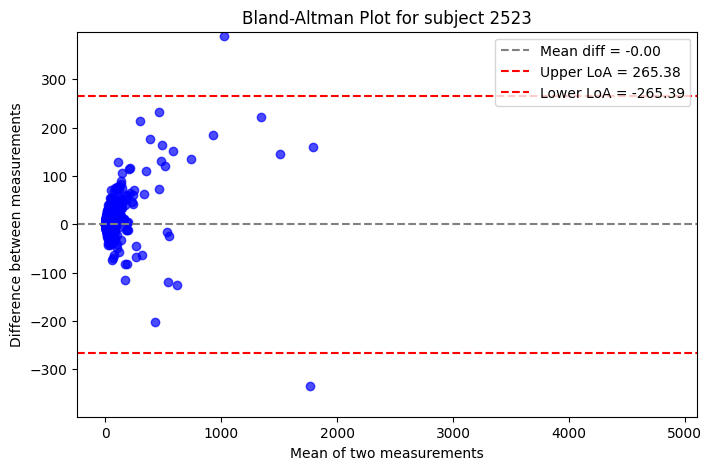

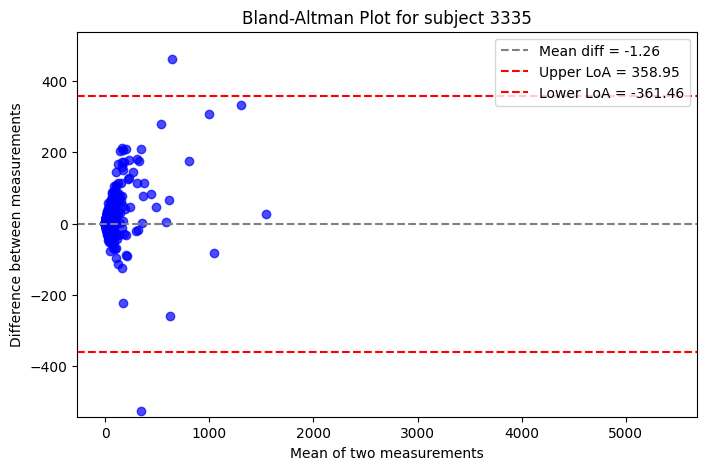

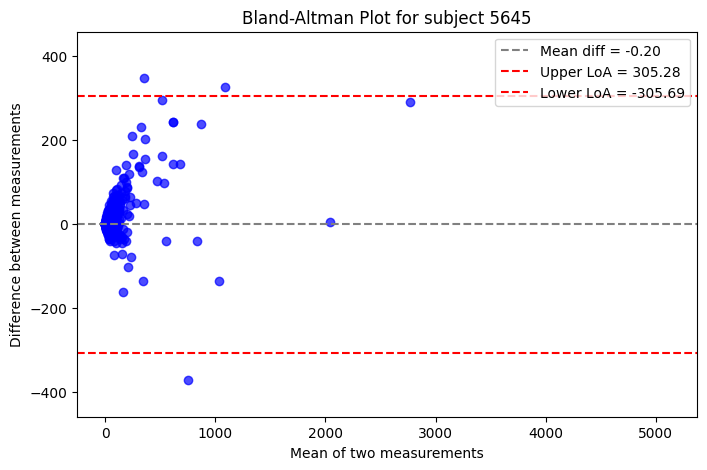

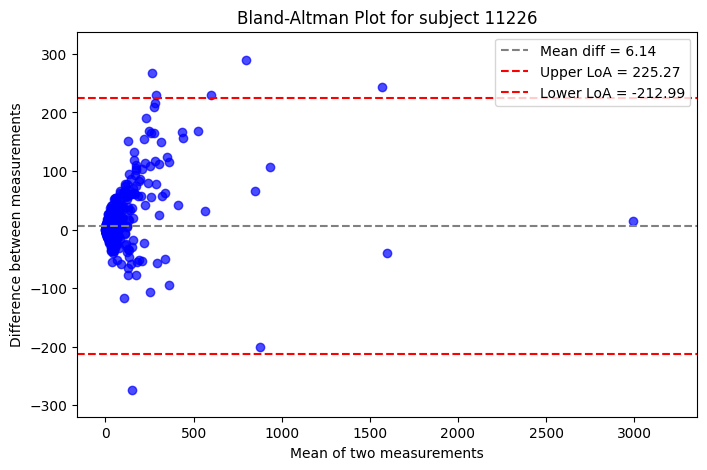

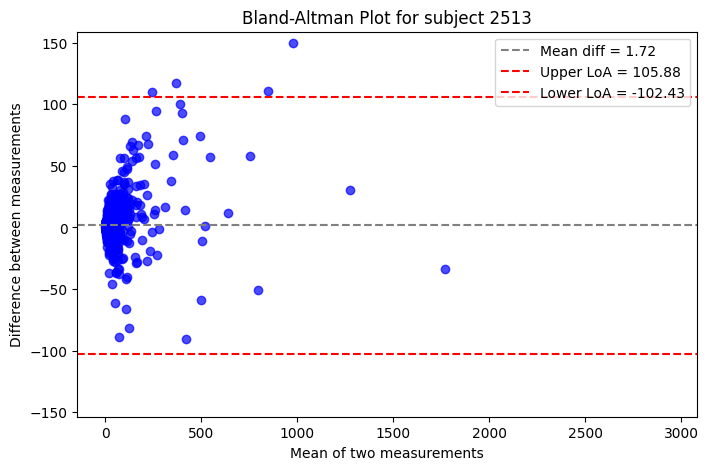

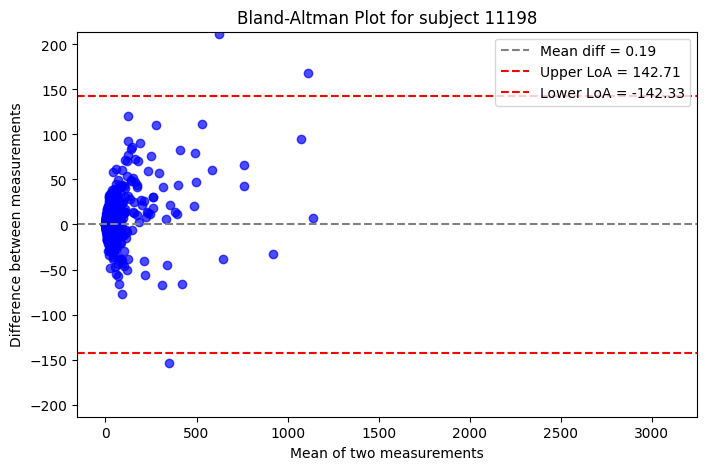

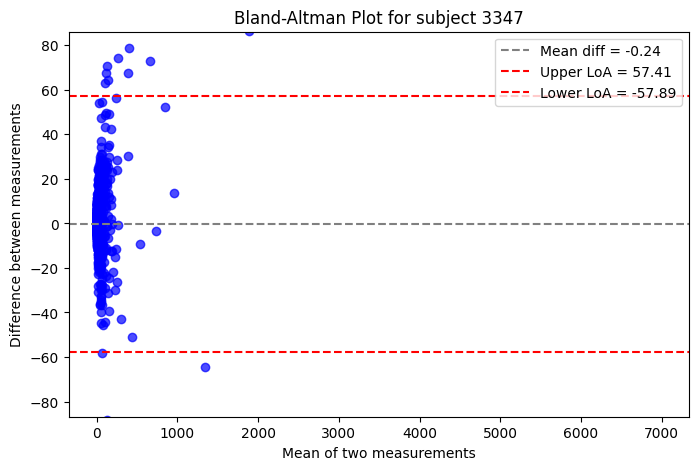

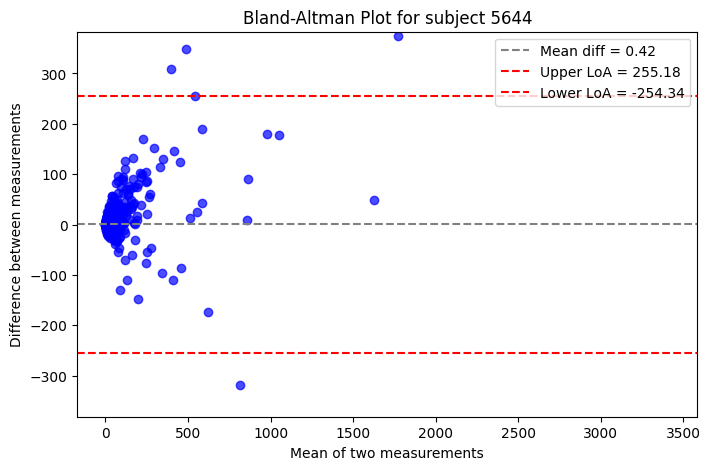

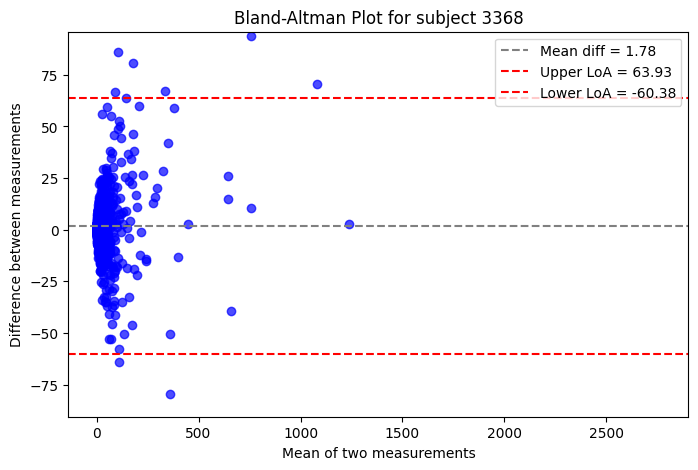

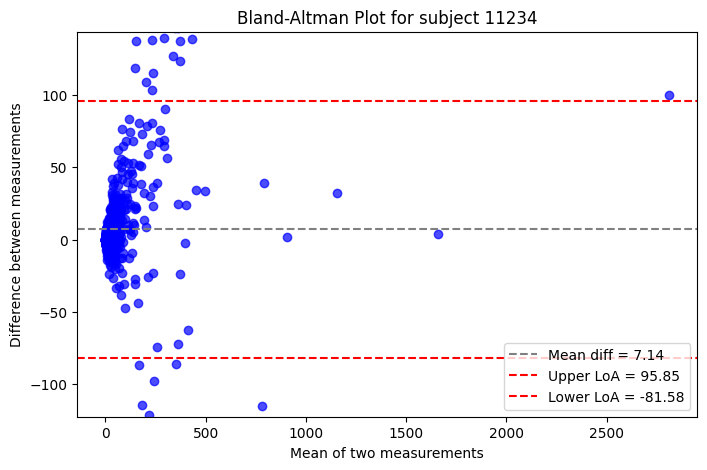

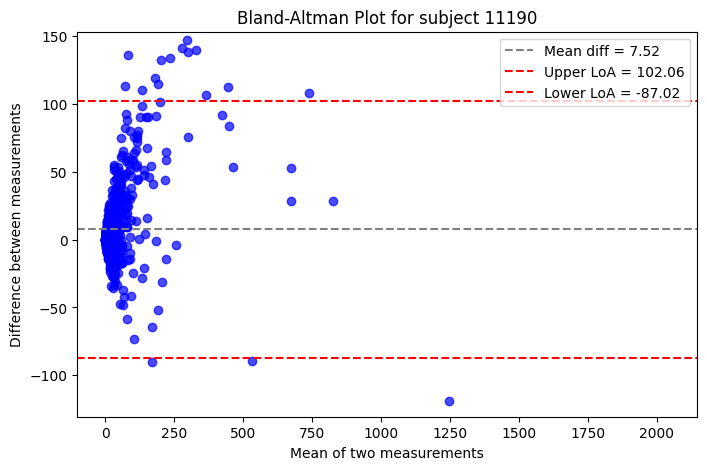

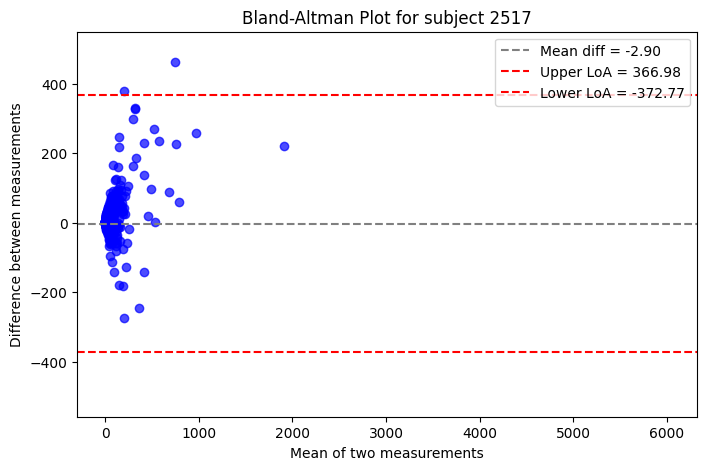

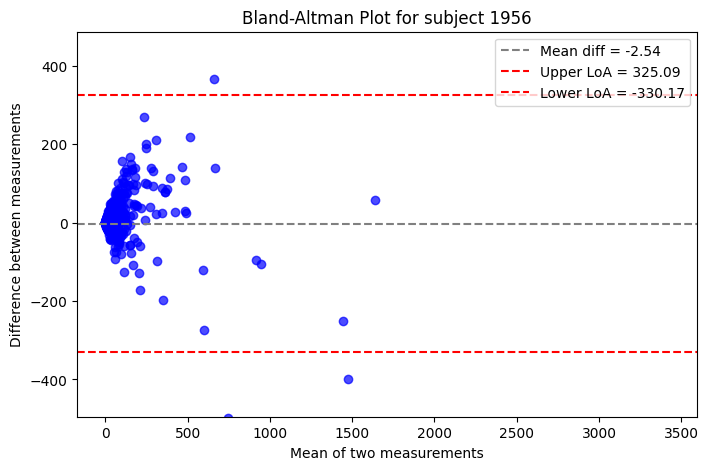

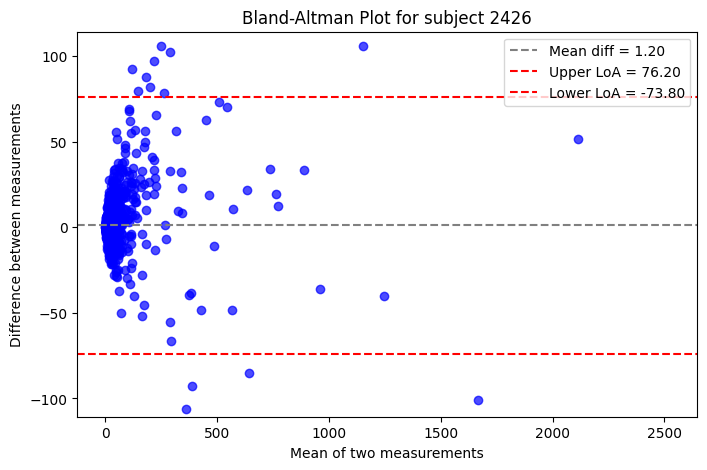

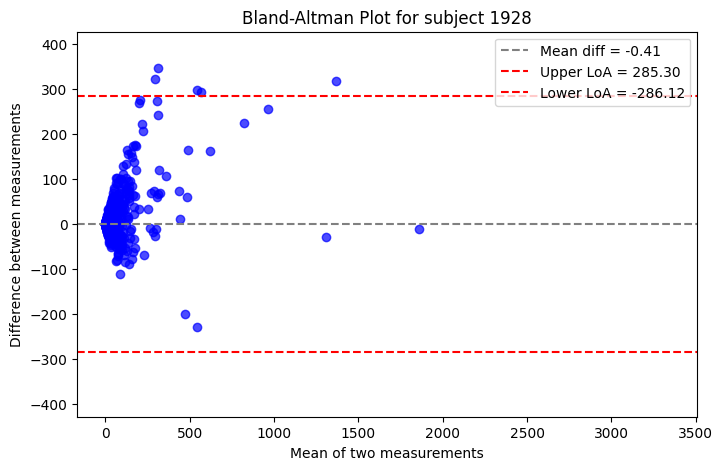

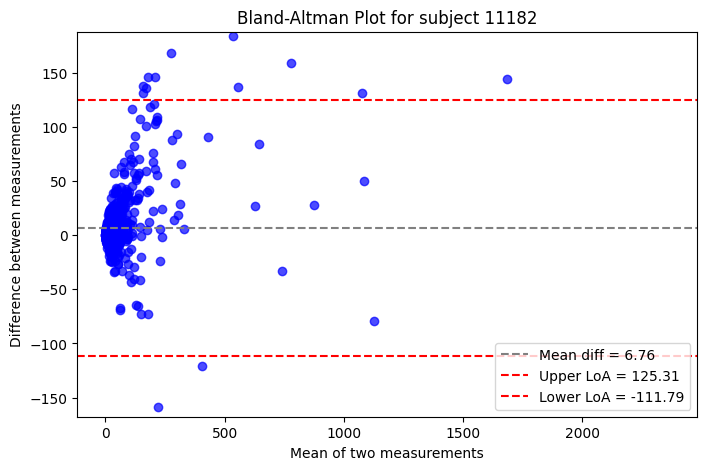

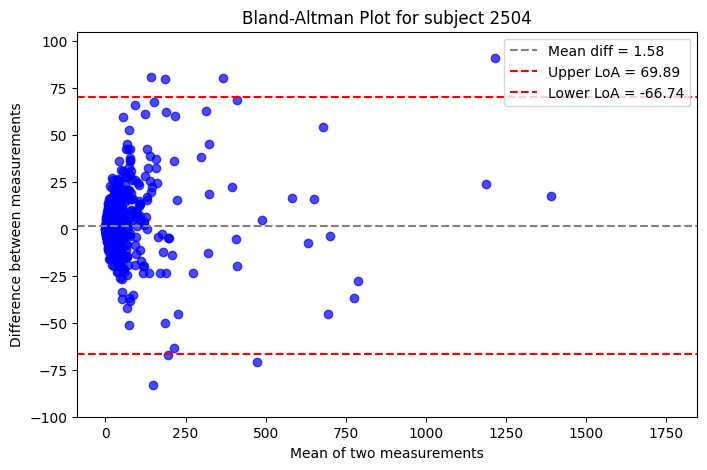

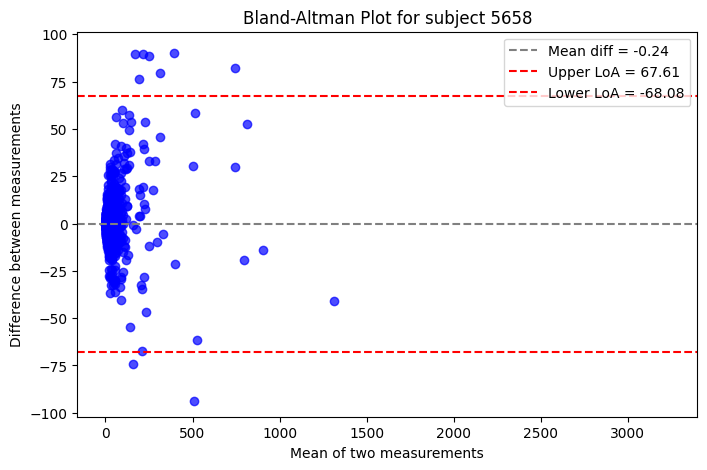

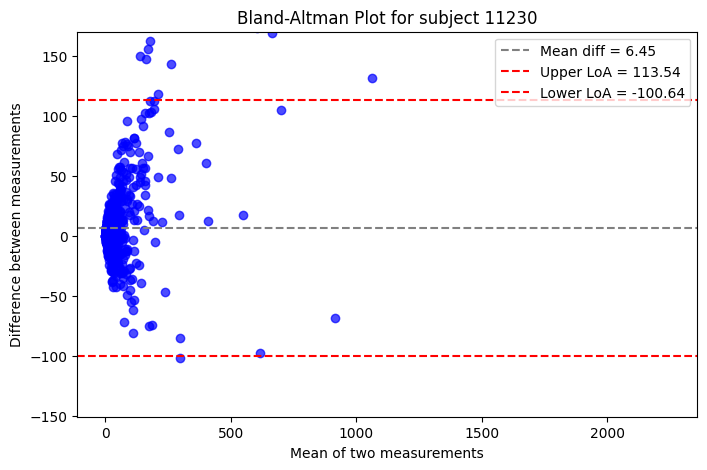

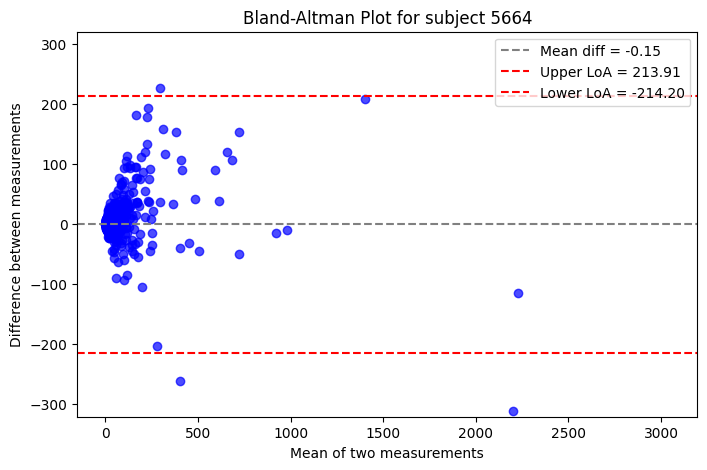

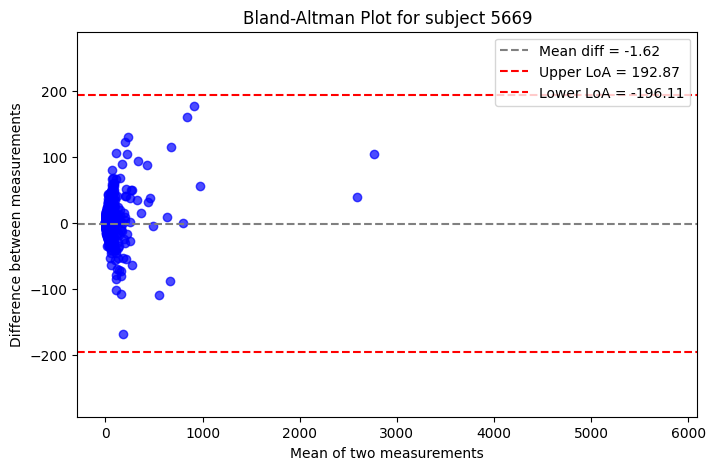

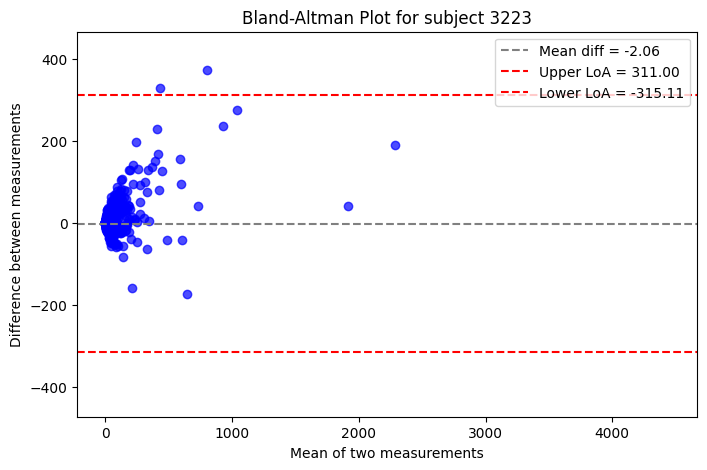

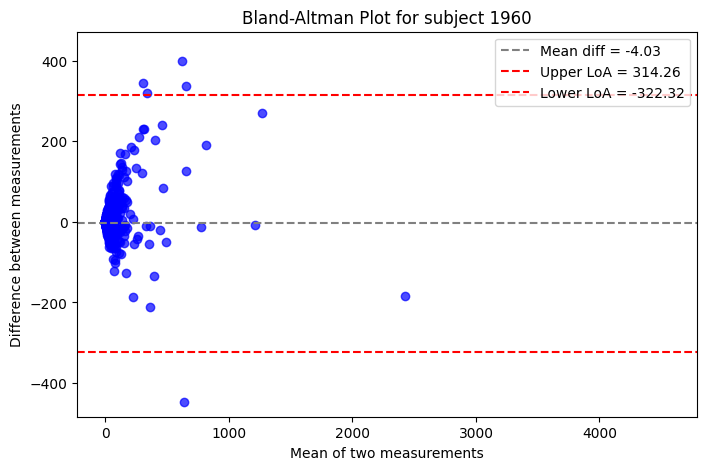

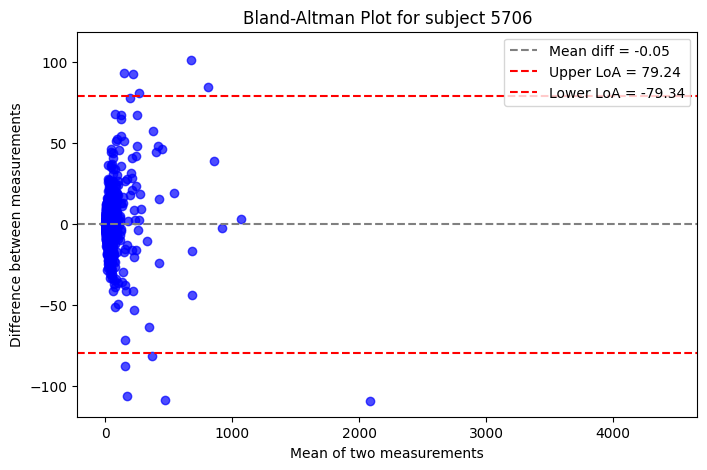

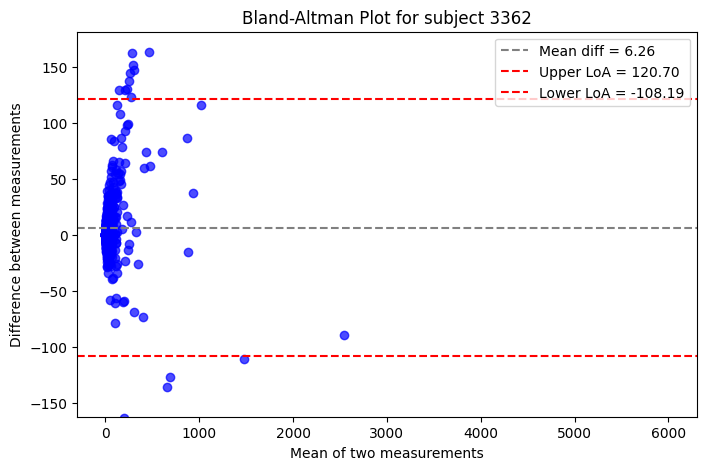

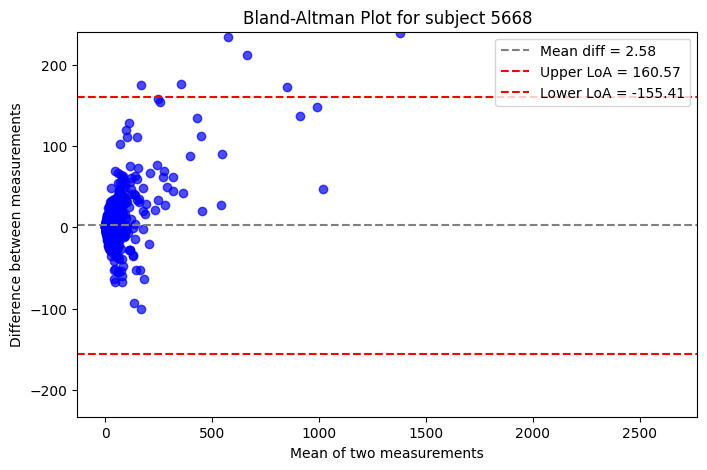

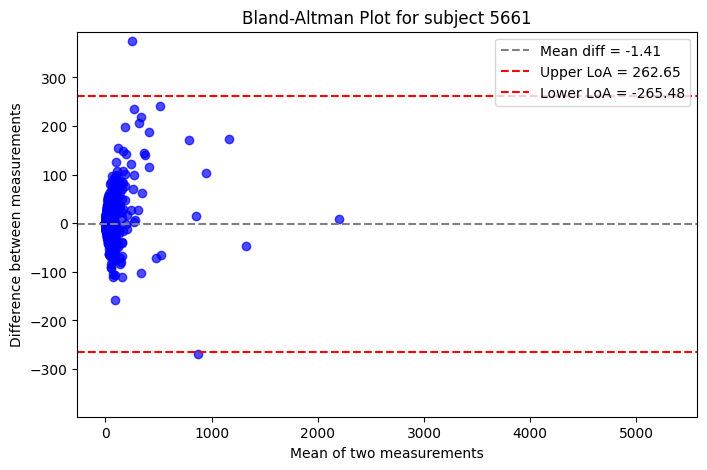

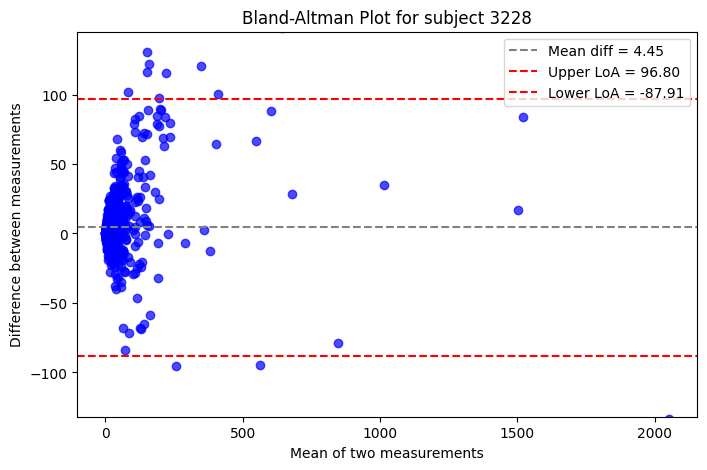

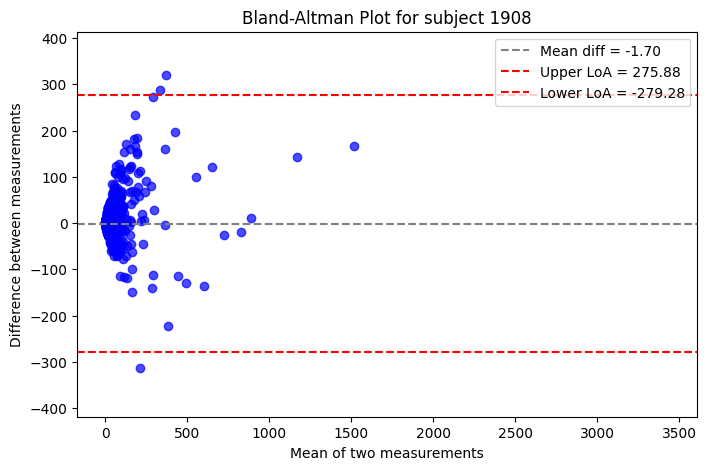

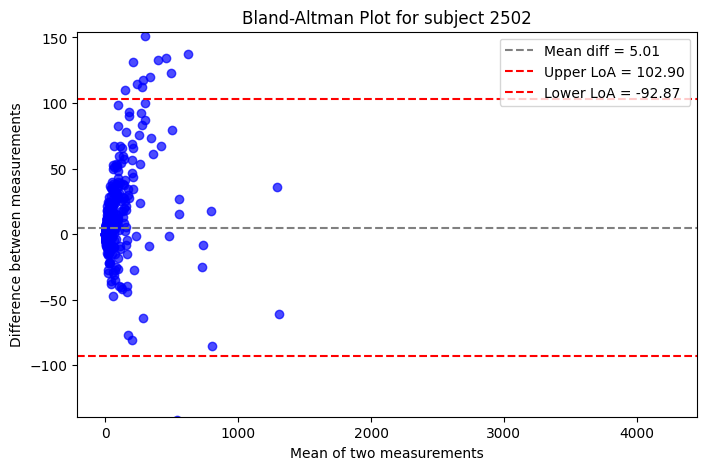

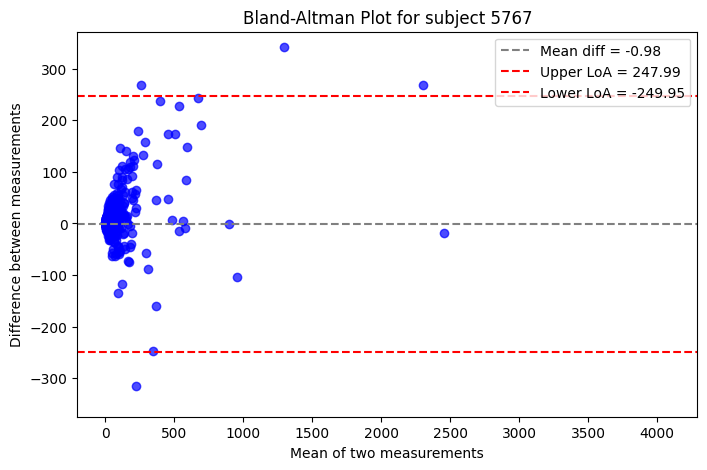

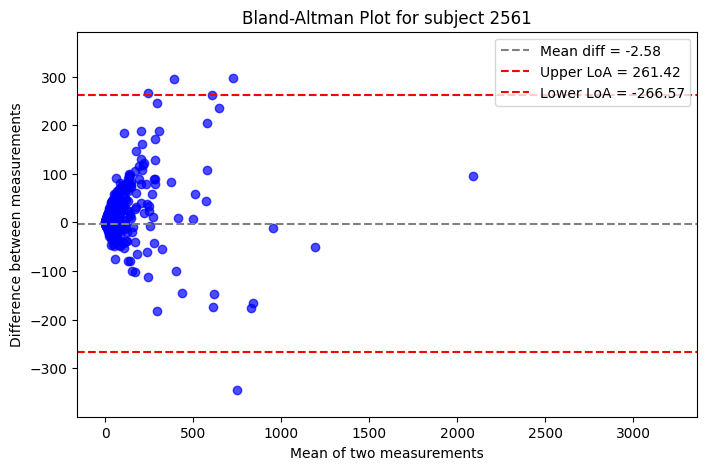

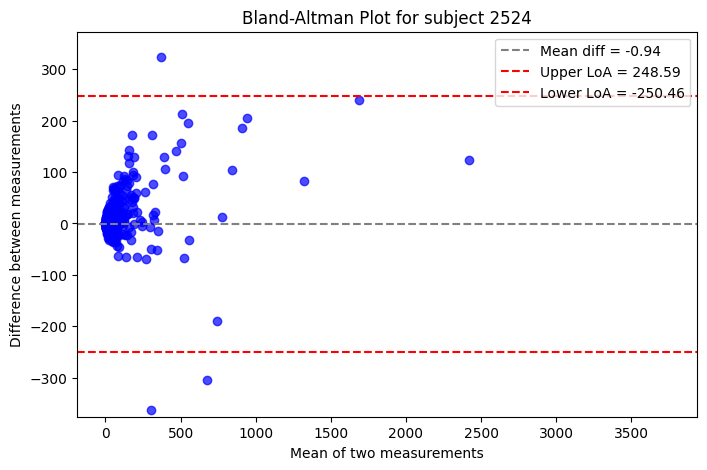

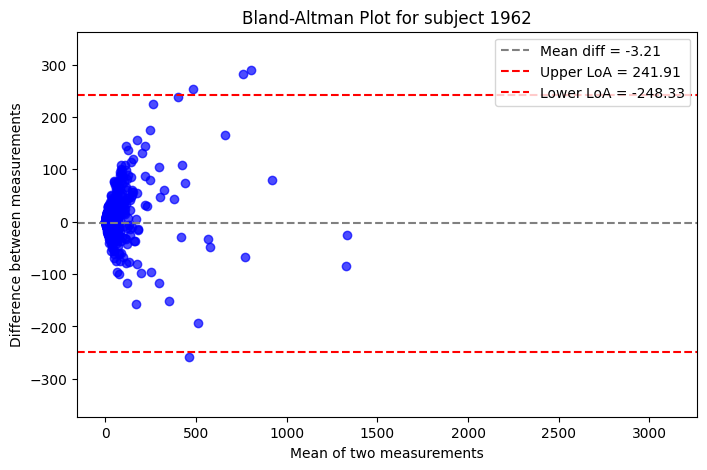

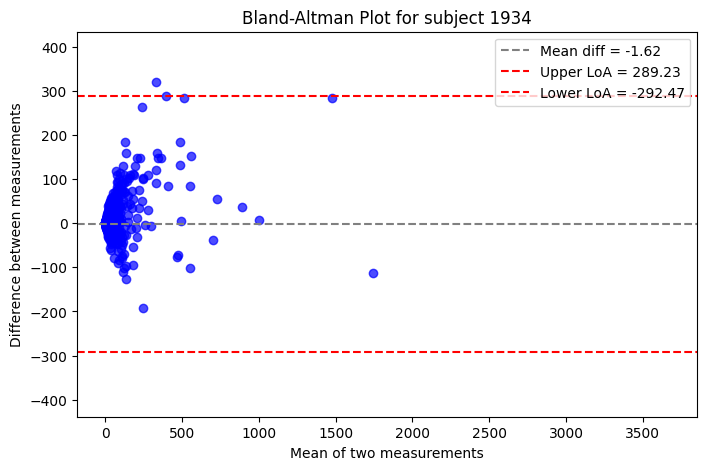

In [7]:
for col in cols_with_replicates:
    plot_bland_altman(patients_df[f"{col}-r1"], 
                      patients_df[f"{col}-r2"], 
                      f"Bland-Altman Plot for subject {col}",
                      save=False,
                      show=True)